In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
pd.options.display.float_format = '{:,.1f}'.format

from eli5.formatters import format_as_dataframe

import warnings
warnings.filterwarnings("ignore")

## Reading and preprocessing data

In [69]:
data = pd.read_csv('data11.csv', sep=',')
data.head()

,Unnamed: 0,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,0,7,2007,ALB,AUT,0,812.9,0,0.0,"10,701,012.0",...,1,1,5,8,40,4404946520,0.3,"38,736.0",0.0,-0.0
1,4,11,2007,ALB,DEU,0,"1,493.1",0,0.0,"10,701,012.0",...,1,1,5,8,276,38729776000,0.3,"1,000.0",0.0,-0.0
2,5,12,2007,ALB,GRC,1,500.1,0,0.0,"10,701,012.0",...,1,1,5,8,300,4411954035,0.3,"11,904.0",0.0,-0.0
3,7,14,2007,ALB,ITA,0,611.8,0,0.0,"10,701,012.0",...,1,1,5,8,381,15399984966,0.3,"7,921.0",0.0,-0.0
4,11,19,2007,DZA,CAN,0,"6,747.0",1,0.0,"134,977,871.9",...,0,0,6,12,124,10123052238,0.1,"1,830.0",0.0,-0.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58291 entries, 0 to 58290
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    58291 non-null  int64  
 1   X             58291 non-null  int64  
 2   year          58291 non-null  int64  
 3   iso3_o        58291 non-null  object 
 4   iso3_d        58291 non-null  object 
 5   contig        58291 non-null  int64  
 6   dist          58291 non-null  float64
 7   comlang_off   58291 non-null  int64  
 8   comrelig      58291 non-null  float64
 9   gdp_o         58291 non-null  float64
 10  gdp_d         58291 non-null  float64
 11  gatt_o        58291 non-null  int64  
 12  gatt_d        58291 non-null  int64  
 13  wto_o         58291 non-null  int64  
 14  wto_d         58291 non-null  int64  
 15  eu_o          58291 non-null  int64  
 16  eu_d          58291 non-null  int64  
 17  rta           58291 non-null  int64  
 18  rta_coverage  58291 non-nu

In [71]:
data[(data['iso3_o'] == 'USA') & (data['iso3_d'] == 'DEU')]

,Unnamed: 0,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
5500,6727,8126,2007,USA,DEU,0,"6,035.3",0,0.3,"14,477,599,703.0",...,0,0,6,842,276,38729776000,0.1,"6,794,158,543.0",0.2,-0.0
11783,14607,18027,2008,USA,DEU,0,"6,035.3",0,0.3,"14,718,600,216.6",...,0,0,6,842,276,45617869098,0.1,"8,247,091,404.0",0.2,-0.0
18402,23184,28979,2009,USA,DEU,0,"6,035.3",0,0.3,"14,418,700,140.5",...,0,0,6,842,276,45240304094,0.1,"9,005,576,312.0",0.2,-0.0
25133,32319,40193,2010,USA,DEU,0,"6,035.3",0,0.3,"14,964,400,062.5",...,0,0,6,842,276,45150772302,0.1,"7,850,577,311.0",0.2,-0.0
31851,41459,51630,2011,USA,DEU,0,"6,035.3",0,0.3,"15,517,900,341.2",...,0,0,6,842,276,48571202589,0.1,"7,666,345,800.0",0.2,-0.0
38563,50643,63375,2012,USA,DEU,0,"6,035.3",0,0.3,"16,163,200,303.1",...,0,0,6,842,276,43534211051,0.1,"7,902,286,615.0",0.2,-0.0
45232,59947,75342,2013,USA,DEU,0,"6,035.3",0,0.3,"16,768,099,680.3",...,0,0,6,842,276,45232159454,0.1,"6,716,611,773.0",0.1,-0.0
51740,69137,87635,2014,USA,DEU,0,"6,035.3",0,0.3,"17,393,103,405.1",...,0,0,6,842,276,49293262755,0.1,"6,578,733,232.0",0.1,-0.0
58139,78092,100100,2015,USA,DEU,0,"6,035.3",0,0.3,"18,036,648,050.7",...,0,0,6,842,276,45670789181,0.1,"7,400,978,048.0",0.2,-0.0


In [72]:
data[(data['iso3_o'] == 'DEU') & (data['iso3_d'] == 'USA')]

,Unnamed: 0,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
2014,2482,2968,2007,DEU,USA,0,"6,035.3",0,0.3,"3,435,506,696.2",...,0,0,6,276,842,49205766777,0.0,"6,494,320,405.0",0.1,-0.0
7822,9637,11711,2008,DEU,USA,0,"6,035.3",0,0.3,"3,747,055,403.0",...,0,0,6,276,842,52907313698,0.0,"5,820,204,902.0",0.1,-0.0
14200,17788,21942,2009,DEU,USA,0,"6,035.3",0,0.3,"3,412,770,160.6",...,0,0,6,276,842,55904582590,0.0,"7,005,594,542.0",0.1,-0.0
20871,26520,32996,2010,DEU,USA,0,"6,035.3",0,0.3,"3,412,008,894.5",...,0,0,6,276,842,61975884991,0.0,"6,446,982,187.0",0.1,-0.0
27575,35625,44212,2011,DEU,USA,0,"6,035.3",0,0.3,"3,752,110,063.6",...,0,0,6,276,842,66150066686,0.0,"7,856,325,798.0",0.1,-0.0
34300,44780,55770,2012,DEU,USA,0,"6,035.3",0,0.3,"3,533,242,368.0",...,0,0,6,276,842,65004006330,0.0,"10,112,242,306.0",0.2,-0.0
40999,53927,67541,2013,DEU,USA,0,"6,035.3",0,0.3,"3,730,260,623.4",...,0,0,6,276,842,63313660043,0.0,"10,603,728,179.0",0.2,-0.0
47600,63202,79606,2014,DEU,USA,0,"6,035.3",0,0.3,"3,879,276,642.3",...,0,0,6,276,842,73042298937,0.0,"13,579,325,558.0",0.2,-0.0
54120,72446,91974,2015,DEU,USA,0,"6,035.3",0,0.3,"3,363,599,810.6",...,0,0,6,276,842,86014133354,0.0,"14,469,293,990.0",0.2,-0.0


In [73]:
data[data['MS']>1].to_csv('ms_more_than_one.csv')

In [74]:
#data = data[data['MS']<1]

##  Regression (model 4)
ln(trade flows) = ln(dist) + dummy_o + dummy_d + RTA + comlang_off+contig

In [75]:
data_model_4 = data[['dist','tr_flows','rta','contig','comlang_off','iso3_o','iso3_d']]

In [76]:
data_log = data_model_4[['rta','contig','comlang_off','iso3_o','iso3_d']]
data_log['tr_flows_log'] = np.log(data_model_4['tr_flows'])
data_log['dist_log'] = np.log(data_model_4['dist'])

In [77]:
#numeric = ['tr_flows_log','dist_log']

In [78]:
# scaler = StandardScaler()
# scaler.fit(data_log[numeric])
# data_log[numeric] = scaler.transform(data_log[numeric])

In [79]:
data_log_transformed = pd.get_dummies(data_log, drop_first=True)

In [80]:
features = data_log_transformed.drop(['tr_flows_log'], axis=1)
target = data_log_transformed['tr_flows_log']

In [81]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [82]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)

model MAE:  1.5728071919048372
model RMSE:  4.46682329698314


In [83]:
feature_names = [col for col in list(features.columns)]

In [84]:
weights = eli5.explain_weights(model,top = 300, feature_names = feature_names, target_names = ['tr_flows_log'])

In [85]:
weights = format_as_dataframe(weights)

In [86]:
weights

,target,feature,weight
0,tr_flows_log,iso3_o_USA,13.5
1,tr_flows_log,<BIAS>,13.3
2,tr_flows_log,iso3_o_FRA,13.0
3,tr_flows_log,iso3_o_DEU,13.0
4,tr_flows_log,iso3_o_IND,13.0
...,...,...,...
285,tr_flows_log,iso3_d_FSM,-3.5
286,tr_flows_log,iso3_d_KNA,-3.6
287,tr_flows_log,iso3_d_STP,-3.6
288,tr_flows_log,iso3_d_AND,-4.3


In [87]:
residual = (target_valid - predicted_valid)

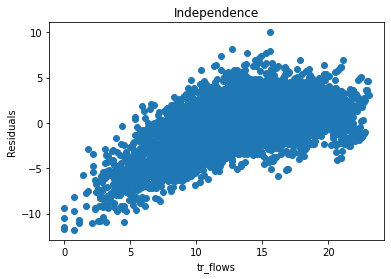

In [88]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows')
plt.ylabel('Residuals')
plt.show()

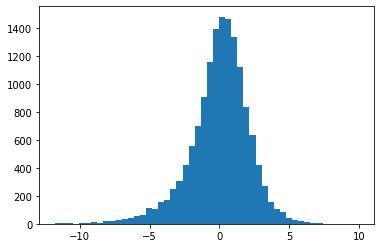

In [89]:
plt.hist(residual, bins =50)

plt.show()

## Regression (model augmented)
1. ln(tr_flows_corrected) = ln(dist)+dummy_o + dummy_d + (-4)*RTA+(-4)*comlang_off+(-4)*contig, 
2. where ln(tr_flows_corrected) = ln(trade flows) +4 * MS * HHI

In [90]:
data.describe()

,Unnamed: 0,X,year,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
count,"58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0",...,"58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0","58,291.0"
mean,"38,240.6","47,986.2","2,011.1",0.0,"6,484.1",0.2,0.2,"1,262,130,058.0","693,347,907.8",0.9,...,0.4,0.8,5.2,441.0,429.5,"4,741,960,014.7",0.1,"67,302,980.2",0.0,-0.0
std,"22,742.1","28,967.3",2.5,0.2,"4,560.9",0.4,0.3,"2,650,747,547.7","2,006,367,757.8",0.3,...,0.5,1.2,1.4,255.6,262.6,"10,427,990,467.4",0.1,"428,505,446.2",0.1,0.0
min,0.0,7.0,"2,007.0",0.0,59.6,0.0,0.0,"318,522.3","123,005.1",0.0,...,0.0,0.0,1.0,8.0,4.0,"266,695.0",0.0,1.0,0.0,-0.9
25%,"18,290.5","22,554.5","2,009.0",0.0,"2,348.9",0.0,0.0,"139,439,620.1","19,479,013.4",1.0,...,0.0,0.0,5.0,208.0,203.0,"180,692,905.0",0.1,"116,426.0",0.0,-0.0
50%,"37,888.0","47,180.0","2,011.0",0.0,"5,982.6",0.0,0.0,"341,497,937.9","102,292,258.8",1.0,...,0.0,0.0,6.0,410.0,417.0,"756,819,700.0",0.1,"1,302,343.0",0.0,-0.0
75%,"57,966.0","72,868.0","2,013.0",0.0,"9,452.8",0.0,0.3,"1,299,051,970.6","429,097,877.5",1.0,...,1.0,1.0,6.0,702.0,682.0,"3,554,256,271.0",0.1,"11,608,104.5",0.0,-0.0
max,"78,318.0","100,423.0","2,015.0",1.0,"19,812.0",1.0,1.0,"18,036,648,050.7","18,036,648,050.7",1.0,...,1.0,3.0,8.0,894.0,894.0,"86,014,133,354.0",0.9,"17,999,129,185.0",3.6,-0.0


In [91]:
data_model_augmented = data[['dist','tr_flows','rta','contig','comlang_off','iso3_o','iso3_d','HHI_value','MS']]

In [92]:
data_log = data_model_augmented[['iso3_o','iso3_d']]
data_log['correction_term'] = 4 * data_model_augmented['MS'] * data_model_augmented['HHI_value']
data_log['tr_flows_corrected'] = np.log(data_model_augmented['tr_flows']) + 4 * data_model_augmented['MS'] * data_model_augmented['HHI_value']
data_log['dist_log'] = np.log(data_model_augmented['dist'])
data_log['4_rta'] = data_model_augmented['rta'] * -4
data_log['4_comlang_off'] = data_model_augmented['comlang_off'] * -4
data_log['4_contig'] = data_model_augmented['contig'] * -4

In [93]:
#numeric = ['tr_flows_corrected','dist_log']

In [94]:
# scaler = StandardScaler()
# scaler.fit(data_log[numeric])
# data_log[numeric] = scaler.transform(data_log[numeric])

In [95]:
data_log_transformed = pd.get_dummies(data_log, drop_first=True)

In [96]:
features = data_log_transformed.drop(['tr_flows_corrected'], axis=1)
target = data_log_transformed['tr_flows_corrected']

In [97]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.5, 
    test_size=0.5, 
    random_state=12345)

In [98]:
features_train.drop(['correction_term'], axis=1)
correction_term = features_valid['correction_term']
features_valid.drop(['correction_term'], axis=1)

,dist_log,4_rta,4_comlang_off,4_contig,iso3_o_ALB,iso3_o_AND,iso3_o_ARE,iso3_o_ARG,iso3_o_ARM,iso3_o_ATG,...,iso3_d_URY,iso3_d_USA,iso3_d_VCT,iso3_d_VEN,iso3_d_VNM,iso3_d_WSM,iso3_d_YEM,iso3_d_ZAF,iso3_d_ZMB,iso3_d_ZWE
13016,9.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54879,9.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56663,8.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27869,8.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35042,9.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5940,8.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57598,9.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50651,8.3,0,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11580,6.9,-4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)

model MAE:  1.512701047475197
model RMSE:  4.2342545966069


In [100]:
feature_names = [col for col in list(features.columns)]

In [101]:
weights = eli5.explain_weights(model, top = 300, feature_names = feature_names, target_names = ['tr_flows_corrected'])

In [102]:
weights = format_as_dataframe(weights)

In [103]:
weights

,target,feature,weight
0,tr_flows_corrected,correction_term,27.3
1,tr_flows_corrected,iso3_o_USA,12.5
2,tr_flows_corrected,<BIAS>,12.3
3,tr_flows_corrected,iso3_o_DEU,12.1
4,tr_flows_corrected,iso3_o_IND,12.0
...,...,...,...
286,tr_flows_corrected,iso3_d_CPV,-2.9
287,tr_flows_corrected,iso3_d_KNA,-3.3
288,tr_flows_corrected,iso3_d_STP,-4.1
289,tr_flows_corrected,iso3_d_AND,-4.1


In [104]:
residual = (target_valid - predicted_valid)

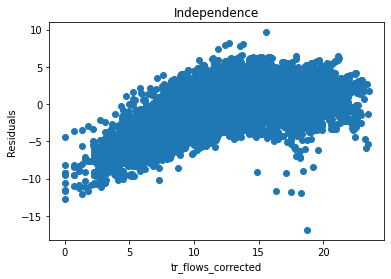

In [105]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows_corrected')
plt.ylabel('Residuals')
plt.show()

### Residuals normality

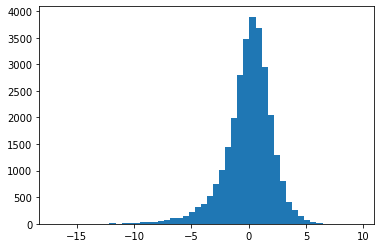

In [106]:
plt.hist(residual, bins =50)

plt.show()

## Professor asked for 

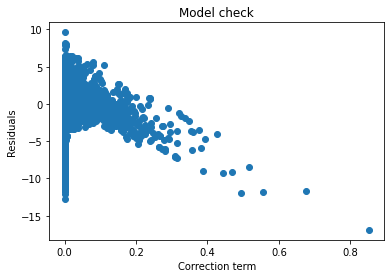

In [107]:
plt.scatter(correction_term, residual)
plt.title('Model check')
plt.xlabel('Correction term')
plt.ylabel('Residuals')
plt.show()

## Dummy residuals

In [108]:
residual = residual.to_frame()
residual.head()

,tr_flows_corrected
13016,-0.5
54879,0.5
56663,0.1
27869,2.0
35042,1.4


In [109]:
residual['dummy'] = residual['tr_flows_corrected'].apply(lambda value: 0 if value <0 else 1)

In [110]:
feature = correction_term
target = residual['dummy']

In [111]:
feature_train, feature_valid, target_train, target_valid = train_test_split(
    feature, 
    target, 
    train_size=0.5, 
    test_size=0.5, 
    random_state=12345)

In [112]:
model = LinearRegression()
model.fit(feature_train.to_numpy().reshape(-1, 1), target_train.to_numpy().reshape(-1, 1))
predicted_valid = model.predict(feature_valid.to_numpy().reshape(-1, 1))

In [113]:
feature_names = ['dummy_residual']

In [114]:
weights = eli5.explain_weights(model, 
                               top = 300, 
                               feature_names = feature_names, 
                               target_names = ['correction_term'])

In [115]:
weights = format_as_dataframe(weights)

In [116]:
weights

,target,feature,weight
0,correction_term,<BIAS>,0.5
1,correction_term,dummy_residual,0.4


In [117]:
residual['correction_term'] = correction_term

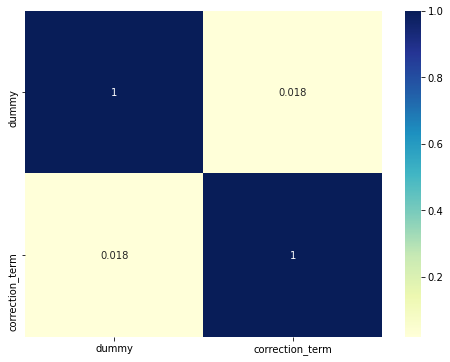

In [118]:
corr_pic = residual[['dummy','correction_term']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr_pic, annot=True, ax = ax,cmap="YlGnBu")
plt.show()